Read the data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
from collections import Counter

try:
    df = pd.read_csv('Twitter Jan Mar.csv')
except pd.errors.ParserError:
    print("Encountered a parsing error, attempting to load without problematic rows")
    df = pd.read_csv('Twitter Jan Mar.csv', on_bad_lines='skip')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500036 entries, 0 to 500035
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           500036 non-null  object 
 1   id             500030 non-null  object 
 2   content        500030 non-null  object 
 3   username       500002 non-null  object 
 4   like_count     499974 non-null  float64
 5   retweet_count  499974 non-null  float64
dtypes: float64(2), object(4)
memory usage: 22.9+ MB


Data Prep


In [36]:

df['like_count'] = pd.to_numeric(df['like_count'], errors='coerce')

# Check for missing values
print("Missing values before removal:", df['like_count'].isnull().sum())

# Remove missing values
df = df.dropna(subset=['like_count'])

# Check for missing values after removal
print("Missing values after removal:", df['like_count'].isnull().sum())

df.head()

Missing values before removal: 62
Missing values after removal: 0


,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0


Finding Key Players and hashtags


In [32]:


# Function to extract mentions and hashtags
def extract_mentions(text):
    return re.findall(r'@(\w+)', text)

def extract_hashtags(text):
    return re.findall(r'#(\w+)', text.lower())

df['mentions'] = df['content'].apply(extract_mentions)
df['hashtags'] = df['content'].apply(extract_hashtags)

# Flatten the list of lists and count occurrences
mentions_counts = Counter([mention for sublist in df['mentions'] for mention in sublist])
hashtags_counts = Counter([hashtag for sublist in df['hashtags'] for hashtag in sublist])

# Get the top 10 mentioned accounts and top 20 hashtags
top_mentions = mentions_counts.most_common(10)
top_hashtags = hashtags_counts.most_common(20)

total_tweets = len(df)

# Creating tables for top mentions and hashtags
mentions_df = pd.DataFrame(top_mentions, columns=['Account', 'Mentions'])
hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Uses'])

# Adding a column for relative frequency
mentions_df['Relative Frequency (%)'] = (mentions_df['Mentions'] / total_tweets) * 100
hashtags_df['Relative Frequency (%)'] = (hashtags_df['Uses'] / total_tweets) * 100

# Displaying  tables
print("Top 10 Mentioned Twitter Accounts")
display(mentions_df)
print("Top 20 Hashtags")
display(hashtags_df)


Top 10 Mentioned Twitter Accounts


,Account,Mentions,Relative Frequency (%)
0,OpenAI,15394,3.078960
1,elonmusk,8727,1.745491
2,ChatGPT,4075,0.815042
3,YouTube,3107,0.621432
4,Microsoft,2838,0.567630
5,Google,2543,0.508626
6,sama,2010,0.402021
7,bing,1348,0.269614
8,BetaMoroney,885,0.177009
9,SpirosMargaris,882,0.176409


Top 20 Hashtags


,Hashtag,Uses,Relative Frequency (%)
0,chatgpt,357674,71.538520
1,ai,106544,21.309908
2,openai,37291,7.458588
3,artificialintelligence,26199,5.240072
4,gpt4,10663,2.132711
5,technology,10088,2.017705
6,google,10053,2.010705
7,microsoft,9025,1.805094
8,gpt,8946,1.789293
9,machinelearning,8888,1.777692


In [ ]:
# @title Mentions

from matplotlib import pyplot as plt
mentions_df['Mentions'].plot(kind='hist', bins=20, title='Mentions')
plt.gca().spines[['top', 'right',]].set_visible(False)

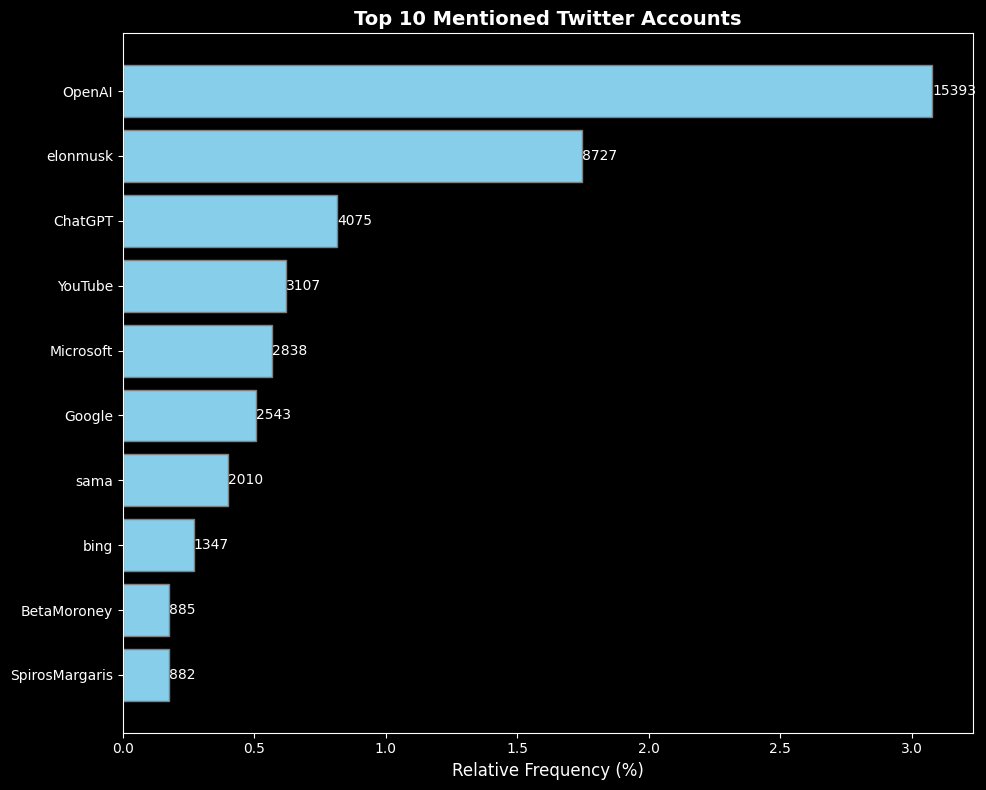

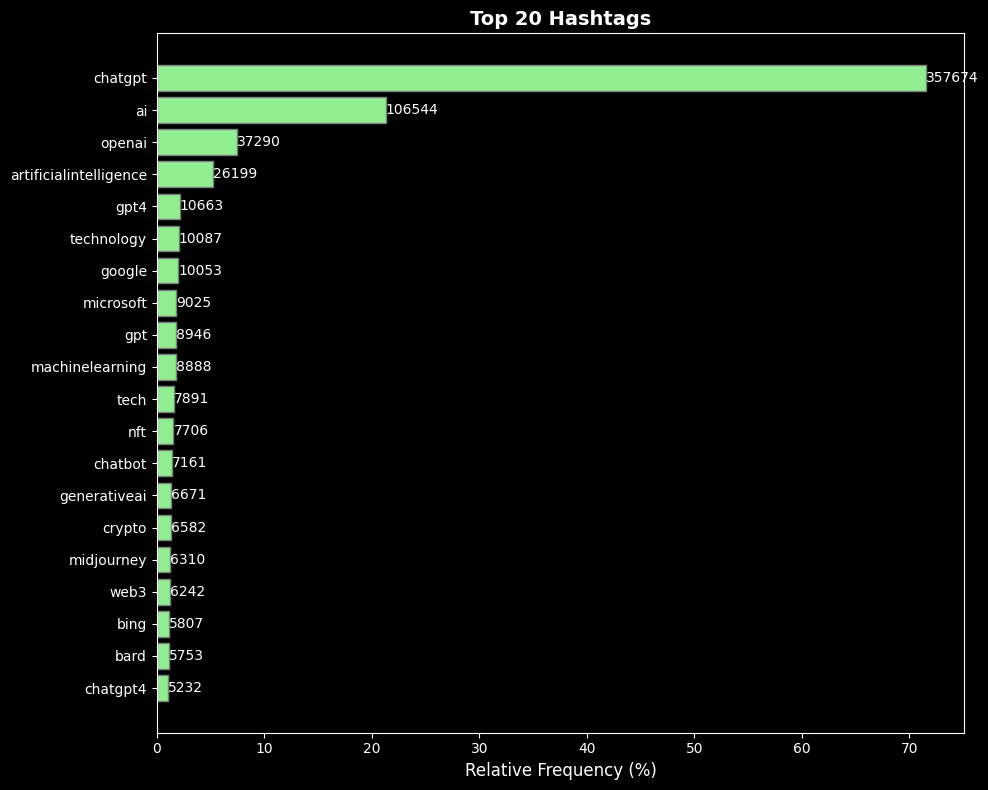

In [34]:
# Extract and reverse data so the largest bars appear at the top
mention_names = [mention[0] for mention in top_mentions][::-1]
mention_values = [mention[1] / total_tweets * 100 for mention in top_mentions][::-1]
hashtag_names = [hashtag[0] for hashtag in top_hashtags][::-1]
hashtag_values = [hashtag[1] / total_tweets * 100 for hashtag in top_hashtags][::-1]

# Visualization for Top Mentions
fig1, ax1 = plt.subplots(figsize=(10, 8))
bars_mentions = ax1.barh(mention_names, mention_values, color='skyblue', edgecolor='grey')
ax1.set_title('Top 10 Mentioned Twitter Accounts', fontsize=14, fontweight='bold')
ax1.set_xlabel('Relative Frequency (%)', fontsize=12)
for i, (value, name) in enumerate(zip(mention_values, mention_names)):
    ax1.text(value, i, f'{int(value * total_tweets / 100)}', va='center', color='white')
plt.tight_layout()
plt.show()

# Visualization for Top Hashtags
fig2, ax2 = plt.subplots(figsize=(10, 8))
bars_hashtags = ax2.barh(hashtag_names, hashtag_values, color='lightgreen', edgecolor='grey')
ax2.set_title('Top 20 Hashtags', fontsize=14, fontweight='bold')
ax2.set_xlabel('Relative Frequency (%)', fontsize=12)
for i, (value, name) in enumerate(zip(hashtag_values, hashtag_names)):
    ax2.text(value, i, f'{int(value * total_tweets / 100)}', va='center', color='white')
plt.tight_layout()
plt.show()